In [1]:
import gymnasium as gym
import ale_py
import matplotlib.pyplot as plt

In [2]:
gym.register_envs(ale_py)
env = gym.make("ALE/Breakout-v5", render_mode="rgb_array")
print('action space:', env.action_space)
print('observation space:', env.observation_space)

action space: Discrete(4)
observation space: Box(0, 255, (210, 160, 3), uint8)


A.L.E: Arcade Learning Environment (version 0.10.1+unknown)
[Powered by Stella]


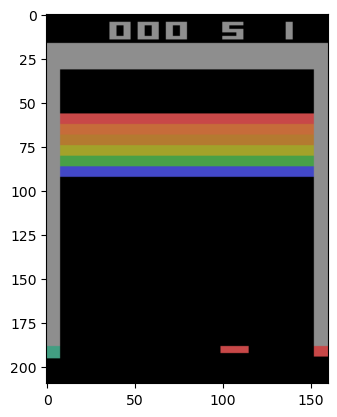

In [3]:
x, info = env.reset(seed=42)
plt.imshow(x)

In [4]:
# print('state', x)
print('shape', x.shape)
print('type', type(x))
print('dtype', x.dtype)
print('min', x.min(), 'max', x.max())
print('info', info)

shape (210, 160, 3)
type <class 'numpy.ndarray'>
dtype uint8
min 0 max 200
info {'lives': 5, 'episode_frame_number': 0, 'frame_number': 0, 'seeds': (3444837047, 2669555309)}


reward 0.0
info {'lives': 5, 'episode_frame_number': 4, 'frame_number': 4}


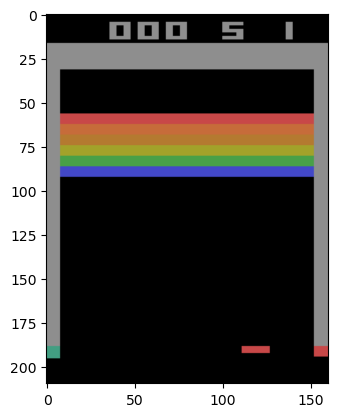

In [5]:
a = env.action_space.sample()
x, r, terminated, truncated, info = env.step(a)
plt.imshow(x)
print('reward', r)
print('info', info)

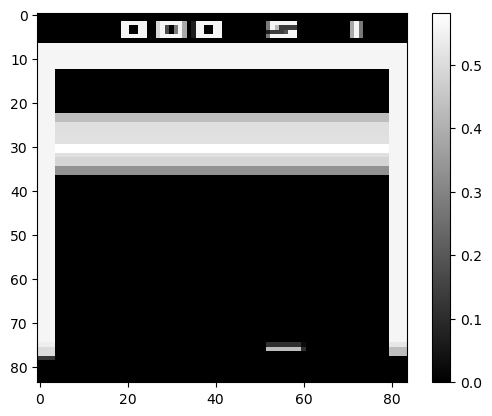

In [6]:
from preprocess import PreprocessWrapper

env = gym.make("ALE/Breakout-v5", render_mode="rgb_array", frameskip=1, repeat_action_probability=0)
env = PreprocessWrapper(env, 4, 'cpu')
x, info = env.reset(seed=42)

plt.imshow(x[0][0], cmap='gray')
plt.colorbar()


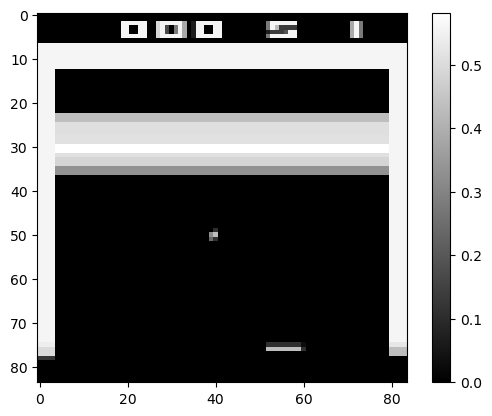

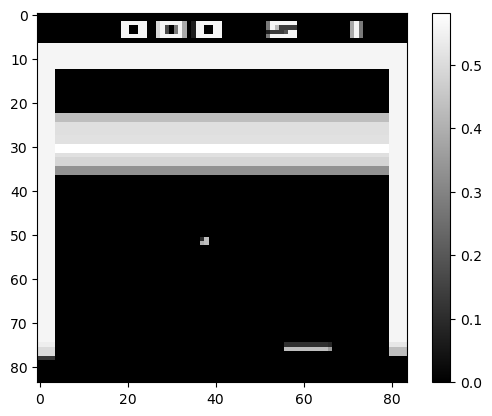

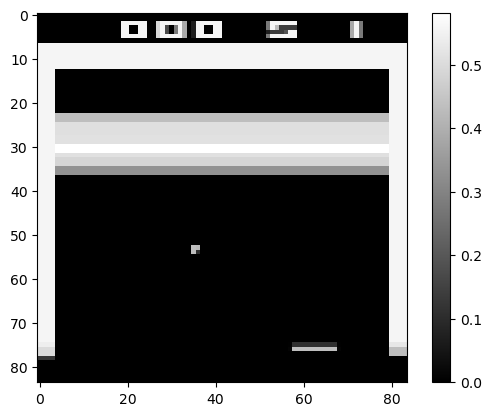

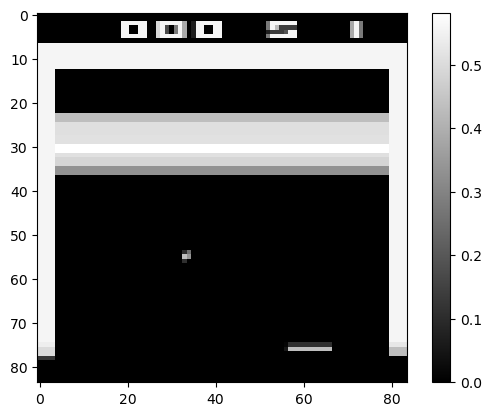

In [7]:
frames = []
for i in range(4):
    a = env.action_space.sample()
    x, r, terminated, truncated, info = env.step(a)
    frames.append(x)

for i in range(4):
    f = frames[i][0][0]
    plt.figure()
    plt.imshow(f, cmap='gray')
    plt.colorbar()